In [1]:
# Initial imports
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [2]:
# Read cleaned data output file from Final_Data_Cleaning.ipynb, Combined_Tweet_Sentiments.csv
combined_df = pd.read_csv("../Preprocessing/Resources/Combined_Tweet_Sentiments.csv")

In [3]:
# Check df
combined_df

,tweet,score
0,"['tim', 'tebow', 'availible', 'wow', 'jerry', ...",1.0
1,"['aga', 'tayo', 'tomorrow', 'ah', ':)', 'good'...",1.0
2,"['lunch', 'new', 'lil', 'spot', '...', 'cotton...",1.0
3,"['snc', 'halloween', 'pr', 'pumped', 'let', 'w...",1.0
4,"['louis', 'inspired', 'outfit', 'monday', 'zay...",1.0
...,...,...
45451,['alright'],0.0
45452,"['mom', 'bought', 'ticket', 'section', 'sat', ...",0.0
45453,"['sat', 'metlife', 'annoying', 'didnt', 'let',...",0.0
45454,"['giant', 'niner', 'fan', 'wanna', 'sunday', '...",0.0


In [4]:
# Dropping neutral tweets from dataframe as part of model optimization
combined_df = combined_df[combined_df.score != 0.0]

In [5]:
# Replace negative 1 scores with 0
combined_df['score'].replace({-1.0: 0}, inplace = True)

/Users/samanthavillanueva/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [6]:
# Seperating features and labels 
X = combined_df['tweet']
y = combined_df['score'].astype('int64')

In [7]:
# Separating the 85% data for training data and 15% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 1000)

In [8]:
# Fit the TF-IDF Vectorizer 
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  144779


In [9]:
# TF-IDF Vectorizer 
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [10]:
# Function to evaluate model

def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion Matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.98      0.05      0.09      1090
           1       0.72      1.00      0.84      2653

    accuracy                           0.72      3743
   macro avg       0.85      0.52      0.46      3743
weighted avg       0.80      0.72      0.62      3743



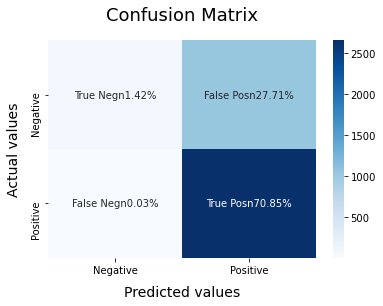

In [11]:
# Bernoulli Naive Bayes Model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1090
           1       0.84      0.94      0.89      2653

    accuracy                           0.83      3743
   macro avg       0.82      0.76      0.78      3743
weighted avg       0.83      0.83      0.82      3743



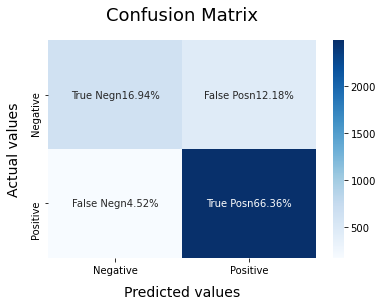

In [12]:
# LinearSVC Model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.49      0.61      1090
           1       0.82      0.96      0.88      2653

    accuracy                           0.82      3743
   macro avg       0.82      0.72      0.75      3743
weighted avg       0.82      0.82      0.80      3743



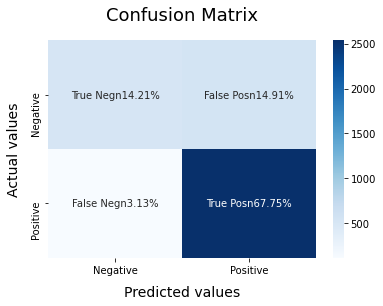

In [13]:
# LR Model
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [14]:
# save vectorizer
pickle.dump(vectoriser, open('vectorizer.pkl', 'wb'))

# save chosen model --- Linear SVC
pickle.dump(SVCmodel, open('model.pkl', 'wb'))